## _*Quantum SVM*_

### Introduction

Please refer to [this file](https://github.com/Qiskit/qiskit-iqx-tutorials/blob/master/qiskit/advanced/aqua/machine_learning/qsvm_classification.ipynb) for introduction.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

First we prepare the dataset, which is used for training, testing and the finally prediction.

*Note: You can easily switch to a different dataset, such as the Breast Cancer dataset, by replacing 'ad_hoc_data' to 'Breast_cancer' below.*

In [2]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shots = 1024

sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, gap=0.3, plot_data=False
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

{'A': 0, 'B': 1}


We construct the svm instance directly from the classes. The programmatic approach offers the users better accessibility, e.g., the users can access the internal state of svm instance or invoke the methods of the instance. We will demonstrate this advantage soon.

Now we create the svm in the programmatic approach.
- We build the svm instance by instantiating the class QSVM. 
- We build the feature map instance (required by the svm instance) by instantiating the class SecondOrderExpansion.

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entangler_map=[[0, 1]])
svm = QSVM(feature_map, training_input, test_input, None)# the data for prediction can be fed later.
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)

Let us check the result.

kernel matrix during the training:


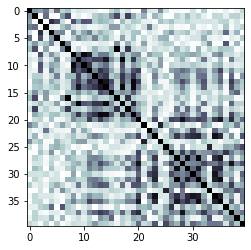

testing success ratio:  1.0


In [4]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

print("testing success ratio: ", result['testing_accuracy'])

The programmatic approach allows the users to invoke APIs upon the svm instance directly. In the following, we invoke the API "predict" upon the trained svm instance to predict the labels for the newly provided data input.

Use the trained model to evaluate data directly, and we store a `label_to_class` and `class_to_label` for helping converting between label and class name

In [5]:
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("preduction:   {}".format(predicted_labels))

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
preduction:   [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
